In [1]:
import matplotlib.pyplot as plt
import numpy as np
from distutils.version import StrictVersion
import pandas as pd
import seaborn as sns
import sys
import warnings
import sklearn
import tensorflow as tf
import keras
import pandas as pd
import time

plt.close('all')

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target




The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

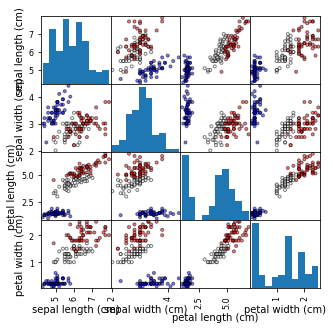

In [2]:
#one hot encoding
from keras.utils.np_utils import to_categorical
num_categories = 3
y = to_categorical(y, num_categories)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8, stratify=y)
colors = 'bwr'#['b','y','r']
CMAP = colors#plt.cm.rainbow
#print(iris.DESCR)

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, cmap=CMAP, edgecolor='black', figsize=(5, 5))

In [3]:
#ANN with 1 hidden layer

from keras.layers import Input
from keras.layers import Dense
from keras.models import Model

#input layer
inputs = Input(shape=(4, ))
#fully connected hidden layer
fc = Dense(3)(inputs)
#output
predictions = Dense(3, activation='softmax')(fc)

model = Model(inputs, predictions)

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
                            
print(np.round(model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]])),2))

#not trained so far



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 12        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________
[[0.59 0.16 0.25]]


In [4]:
######################## now train

start_time = time.time()

model.fit(X_train, y_train, epochs=500, validation_split=0.3)

print()
print()
print("--- %s seconds ---" % (time.time() - start_time))
print()




print(np.round(model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]])),2))

print()
print()
print('Train loss/accuracy')
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(train_loss, train_accuracy)

print('Test loss/accuracy')
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(test_loss, test_accuracy)

Epoch 1/500
3/3 [==============================] - 1s 355ms/step - loss: 1.0164 - accuracy: 0.3871 - val_loss: 1.0253 - val_accuracy: 0.3750
Epoch 2/500
3/3 [==============================] - 0s 12ms/step - loss: 0.9966 - accuracy: 0.4673 - val_loss: 1.0185 - val_accuracy: 0.5000
Epoch 3/500
3/3 [==============================] - 0s 10ms/step - loss: 1.0311 - accuracy: 0.5406 - val_loss: 1.0126 - val_accuracy: 0.5625
Epoch 4/500
3/3 [==============================] - 0s 10ms/step - loss: 0.9941 - accuracy: 0.6413 - val_loss: 1.0073 - val_accuracy: 0.5938
Epoch 5/500
3/3 [==============================] - 0s 10ms/step - loss: 1.0129 - accuracy: 0.6657 - val_loss: 1.0016 - val_accuracy: 0.5938
Epoch 6/500
3/3 [==============================] - 0s 11ms/step - loss: 0.9722 - accuracy: 0.6931 - val_loss: 0.9958 - val_accuracy: 0.5938
Epoch 7/500
3/3 [==============================] - 0s 10ms/step - loss: 0.9754 - accuracy: 0.6853 - val_loss: 0.9902 - val_accuracy: 0.5938
Epoch 8/500
3/3 [==

In [5]:
from keras.models import Sequential

model = Sequential()

from keras.layers import Dense

model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
              
              
model.compile(loss=keras.losses.categorical_crossentropy, 
          optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True))
    

Epoch 1/5


ValueError: in user code:

    /home/cmoestl/miniconda/envs/ait2/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/cmoestl/miniconda/envs/ait2/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/cmoestl/miniconda/envs/ait2/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/cmoestl/miniconda/envs/ait2/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/cmoestl/miniconda/envs/ait2/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/cmoestl/miniconda/envs/ait2/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /home/cmoestl/miniconda/envs/ait2/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /home/cmoestl/miniconda/envs/ait2/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/cmoestl/miniconda/envs/ait2/lib/python3.9/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected axis -1 of input shape to have value 100 but received input with shape (None, 4)
